In [30]:
import glob
import pandas as pd
import os
import torch
import librosa
import random

from BEATs.Tokenizers import TokenizersConfig, Tokenizers
from BEATs.BEATs import BEATs, BEATsConfig

data_folder = "/data/ESC-50-master/"
audio = glob.glob("/data/ESC-50-master/audio/*.wav")
labels = pd.read_csv("/data/ESC-50-master/meta/esc50.csv")

In [62]:
random_cat = random.sample(list(labels['category'].unique()), 5)
labels = labels[labels["category"].isin(random_cat)].sample(100)

In [56]:
df_audio = pd.DataFrame(audio, columns=["filepath"])
df_audio["filename"] = [f.split("/")[-1] for f in audio]
df_audio

,filepath,filename
0,/data/ESC-50-master//audio/1-100032-A-0.wav,1-100032-A-0.wav
1,/data/ESC-50-master//audio/1-100038-A-14.wav,1-100038-A-14.wav
2,/data/ESC-50-master//audio/1-100210-A-36.wav,1-100210-A-36.wav
3,/data/ESC-50-master//audio/1-100210-B-36.wav,1-100210-B-36.wav
4,/data/ESC-50-master//audio/1-101296-A-19.wav,1-101296-A-19.wav
...,...,...
1995,/data/ESC-50-master//audio/5-263831-B-6.wav,5-263831-B-6.wav
1996,/data/ESC-50-master//audio/5-263902-A-36.wav,5-263902-A-36.wav
1997,/data/ESC-50-master//audio/5-51149-A-25.wav,5-51149-A-25.wav
1998,/data/ESC-50-master//audio/5-61635-A-8.wav,5-61635-A-8.wav


In [65]:
filepath_labels = labels.merge(df_audio, how="inner", on="filename")

In [66]:
filepath_labels

,filename,fold,target,category,esc10,src_file,take,filepath_x,filepath_y
0,3-119120-C-48.wav,3,48,fireworks,False,119120,C,/data/ESC-50-master//audio/3-119120-C-48.wav,/data/ESC-50-master//audio/3-119120-C-48.wav
1,1-172649-E-40.wav,1,40,helicopter,True,172649,E,/data/ESC-50-master//audio/1-172649-E-40.wav,/data/ESC-50-master//audio/1-172649-E-40.wav
2,4-117627-A-25.wav,4,25,footsteps,False,117627,A,/data/ESC-50-master//audio/4-117627-A-25.wav,/data/ESC-50-master//audio/4-117627-A-25.wav
3,4-161099-B-47.wav,4,47,airplane,False,161099,B,/data/ESC-50-master//audio/4-161099-B-47.wav,/data/ESC-50-master//audio/4-161099-B-47.wav
4,4-255371-A-47.wav,4,47,airplane,False,255371,A,/data/ESC-50-master//audio/4-255371-A-47.wav,/data/ESC-50-master//audio/4-255371-A-47.wav
...,...,...,...,...,...,...,...,...,...
95,5-193473-B-12.wav,5,12,crackling_fire,True,193473,B,/data/ESC-50-master//audio/5-193473-B-12.wav,/data/ESC-50-master//audio/5-193473-B-12.wav
96,2-188822-C-40.wav,2,40,helicopter,True,188822,C,/data/ESC-50-master//audio/2-188822-C-40.wav,/data/ESC-50-master//audio/2-188822-C-40.wav
97,2-18766-B-12.wav,2,12,crackling_fire,True,18766,B,/data/ESC-50-master//audio/2-18766-B-12.wav,/data/ESC-50-master//audio/2-18766-B-12.wav
98,5-251963-A-47.wav,5,47,airplane,False,251963,A,/data/ESC-50-master//audio/5-251963-A-47.wav,/data/ESC-50-master//audio/5-251963-A-47.wav


In [67]:
list(filepath_labels["filepath_x"])

['/data/ESC-50-master//audio/3-119120-C-48.wav',
 '/data/ESC-50-master//audio/1-172649-E-40.wav',
 '/data/ESC-50-master//audio/4-117627-A-25.wav',
 '/data/ESC-50-master//audio/4-161099-B-47.wav',
 '/data/ESC-50-master//audio/4-255371-A-47.wav',
 '/data/ESC-50-master//audio/4-218304-B-25.wav',
 '/data/ESC-50-master//audio/1-4211-A-12.wav',
 '/data/ESC-50-master//audio/1-115545-B-48.wav',
 '/data/ESC-50-master//audio/3-150979-B-40.wav',
 '/data/ESC-50-master//audio/3-104632-A-12.wav',
 '/data/ESC-50-master//audio/1-155858-B-25.wav',
 '/data/ESC-50-master//audio/4-125929-A-40.wav',
 '/data/ESC-50-master//audio/5-251957-A-47.wav',
 '/data/ESC-50-master//audio/2-18766-A-12.wav',
 '/data/ESC-50-master//audio/2-78781-A-47.wav',
 '/data/ESC-50-master//audio/5-213802-A-12.wav',
 '/data/ESC-50-master//audio/4-117630-A-25.wav',
 '/data/ESC-50-master//audio/2-117617-A-48.wav',
 '/data/ESC-50-master//audio/3-103597-A-25.wav',
 '/data/ESC-50-master//audio/5-193473-A-12.wav',
 '/data/ESC-50-master//a

In [4]:
# Open file and resample at 16000Hz
trs = []
l = []

for afile in audio:
    sig, sr = librosa.load(afile, sr = 16000, mono=True)
    sig_t = torch.tensor(sig).unsqueeze(0)
    trs.append(sig_t)
    l.append(afile.split("/")[-2])

In [5]:
# load the pre-trained checkpoints
checkpoint = torch.load('/data/BEATs/BEATs_iter3_plus_AS2M.pt')
cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# extract the the audio representation
l_representations = []

for t in trs:
    padding_mask = torch.zeros(t.shape[0], t.shape[1]).bool()
    representation = BEATs_model.extract_features(t, padding_mask=padding_mask)[0]
    l_representations.append(representation[:,-1,:]) # Take only the last dimension as this is the encoded audio

In [10]:
from sklearn.manifold import TSNE
import torch

representation = torch.cat(l_representations, dim=0)
representation = representation.detach().numpy()
tsne = TSNE(n_components=2, perplexity=5)
representation_2d = tsne.fit_transform(representation)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

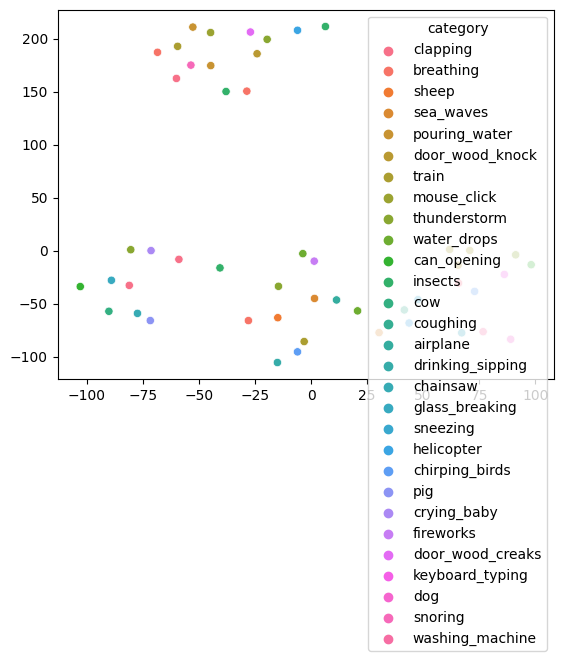

In [28]:
import seaborn as sns
sns.scatterplot(x = representation_2d[:, 0], y = representation_2d[:, 1], hue = labels['category'])